In [ ]:
"""참고사항"""
path = r''
files = glob.glob(path+'./*.csv')
if not files:
    print("Chck Phath")
    sys.exit()
for i in files:
    im = pd.read_csv(path + '/' + i)


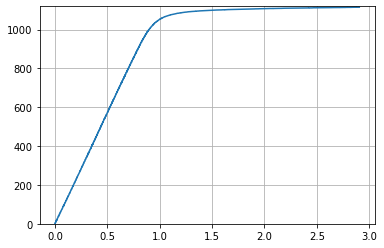

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import glob

dfa=pd.read_csv(r'C:/Users/ghrms/Documents\카카오톡 받은 파일\b.csv')
pd.options.display.max_rows = 999

dfa = dfa.loc[0:5000]  ## 자르는 파트

plt.plot(dfa['Strain - %'], dfa['Stress - MPa'])
plt.ylim(0,1120)
plt.grid()

In [ ]:
stress_Al = dfa['Stress - MPa']
strain_Al = dfa['Strain - %']

E_stress = stress_Al[stress_Al.between(200,800)]  ## 힘 범위
E_strain = strain_Al[stress_Al.between(200,800)]

"""확대파트"""
plt.plot(E_strain, E_stress)

In [68]:
res = linregress(E_strain, E_stress)

E_Al = res[0]

stress_offset = E_Al*(strain_Al - 0.2)

"""수동"""
plt.plot(strain_Al, stress_Al, strain_Al, stress_offset)
# plt.xlim(1,1.2)
plt.show()


LinregressResult(slope=1149.9610154945387, intercept=-2.7952812511108505, rvalue=0.9999838680125808, pvalue=0.0, stderr=0.14064433206541574)

In [90]:
"""자동"""

for i in range(2, len(strain_Al)):
    #when the offset line is first goes above the stress strain curve...
    if stress_offset[i] > stress_Al[i]:
        # pull out the points from the stress strain curve
        sx1 = strain_Al[i-1]
        sy1 = stress_Al[i-1]
        sy2 = stress_Al[i]
        sx2 = strain_Al[i]
        # pull out the points from the 0.002 offset line
        ox1 = strain_Al[i-1]
        oy1 = stress_offset[i-1]
        ox2 = strain_Al[i]
        oy2 = stress_offset[i]
        break

print(ox1)
print(oy1)
print(ox2)
print(oy2)
print(sx1)
print(sy1)
print(sx2)
print(sy2)

1.137
1077.5134715183829
1.14
1080.9633545648664
1.137
1080.522
1.14
1080.525


In [91]:
# first set of two points, from the 0.002 offset line
x1 = ox1
y1 = oy1
x2 = ox2
y2 = oy2

# second set of two points, from the stress strain curve
x3 = sx1
y3 = sy1
x4 = sx2
y4 = sy2
# formula for the y corrdinate of the intersection two lines defined by two points
YS = ( (x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4)  ) / ( ( (x1-x2) * (y3-y4) ) - ( (y1-y2)*(x3-x4) ))
YS

plt.savefig()
plt.close()

1080.52461847745